**Introduction to Applications of Quantum Computing to Quan-
tum Chemistry**

1.   **Obtaining expectation value of a Hamiltonian.**

Consider the following Hamiltonian:
$$
H = \frac{1}{3}\sum_{i<j}X_iX_j-\sum_{n=0}^{n-1}Z_i
$$
where $n$ is the number of qubits (or wires, in Pennylane language), $X_i$ and $Z_i$ are the Pauli-X and Pauli-Z operators acting on the i-th qubit, respectively, and $\sum_{i<j}$ denotes a sum over all pairs $(i, j)$ where $i < j$. For example, for n = 3, the pairs that contribute to
the sum over $i < j$ are $(0, 1)$,$(0, 2)$ and $(1, 2)$.

Note that indexing starts from 0. You must implement in Pennylane a function that simulates a quantum circuit where the qubits start in the state $|0⟩$ and a Hadamard gate H is applied to all of them, producing a final state $|\psi⟩$.

The function must receive the number of qubits and return the expectation value of K for $|\psi⟩$.

In [1]:
# Installing Pennylane

!pip install pennylane

# Exercise 1

def get_expectation_value():


  # Importing the libraries
  import pennylane as qml
  from pennylane import numpy as pnp

  # Requsting the number of qubits

  n_qubits = int(input("Enter the number of qubits that you desire: "))

  coefs = [1/3, -1]
  ops = [sum([qml.PauliX(i)@qml.PauliX(j) for i in range(n_qubits) for j in range(n_qubits) if i < j]), sum([qml.PauliZ(i) for i in range(n_qubits - 1)])]

  # Hamiltonian

  H = qml.Hamiltonian(coefs, ops)

  # Printing the Hamltonian

  print(f"\n\n\nThe Hamiltonian is given by: {H}\n\n\n")

  # Creating the circuit

  dev = qml.device("default.qubit", wires=n_qubits)
  @qml.qnode(dev)
  def circuit():
    # Applying the Hadamard-Walsh Transmorm(Applying H to each wire).
    for i in range(n_qubits):
      qml.Hadamard(wires=i)
    return qml.expval(H)

  # Printing out the expectet value of the Hamiltonian:

  print(f"\n\n\nThe expectation value of the Hamiltonian is: {circuit()}\n\n\n")

  # Drawing the circuit

  qml.draw_mpl(circuit)();

  return ''




The Hamiltonian is given by: 0.3333333333333333 * (X(0) @ X(1) + X(0) @ X(2) + X(0) @ X(3) + X(0) @ X(4) + X(1) @ X(2) + X(1) @ X(3) + X(1) @ X(4) + X(2) @ X(3) + X(2) @ X(4) + X(3) @ X(4)) + -1 * (Z(0) + Z(1) + Z(2) + Z(3))






The expectation value of the Hamiltonian is: 3.333333333333325






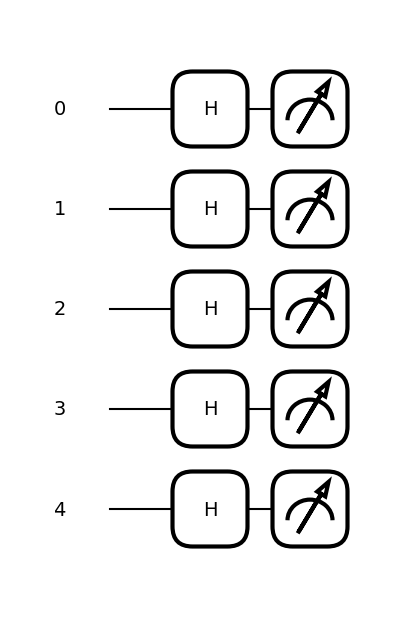

In [2]:
# Answer question 1

print(get_expectation_value())